## 699. Falling Squares

 **Hard**


On an infinite number line ($x$-axis), we drop given squares in the order they are given.

The $i$-th square dropped (<font color=red>$\texttt{positions}[i] = (\texttt{left}, \texttt{side_length})$</font>) is a square with the left-most point being `positions[i][0]` and side length `positions[i][1]`.

The square is dropped with the bottom edge parallel to the number line, and from a higher height than all currently landed squares. We wait for each square to stick before dropping the next.

The squares are infinitely sticky on their bottom edge, and will remain fixed to any positive length surface they touch (either the number line or another square). Squares dropped adjacent to each other will not stick together prematurely.

 
Return a list ans of heights. Each height $\texttt{ans}[i]$ represents the current highest height of any square we have dropped, after dropping squares represented by $\texttt{positions}[0]$, $\texttt{positions}[1]$, $\ldots$, $\texttt{positions}[i]$.

### Example 1:

**Input**: $[[1, 2], [2, 3], [6, 1]]$

**Output**: $[2, 5, 5]$

**Explanation**:

After the first drop of $\texttt{positions}[0] = [1, 2]$: `_aa _aa -------` The maximum height of any square is 2.

After the second drop of $\texttt{positions}[1] = [2, 3]$: `__aaa __aaa __aaa _aa__ _aa__ --------------` The maximum height of any square is 5. The larger square stays on top of the smaller square despite where its center of gravity is, because squares are infinitely sticky on their bottom edge.

After the third drop of $\texttt{positions}[1] = [6, 1]$: `__aaa __aaa __aaa _aa _aa___a --------------` The maximum height of any square is still 5. Thus, we return an answer of $[2, 5, 5]$.

 

 
### Example 2:

**Input**: $[[100, 100], [200, 100]]$

**Output**: $[100, 100]$

**Explanation**: Adjacent squares don't get stuck prematurely - only their bottom edge can stick to surfaces.
 

### Note:

- $1 \leq \texttt{positions.length} \leq 1000$.

- $1 \leq \texttt{positions}[i][0] \leq 10^8$.

- $1 \leq \texttt{positions}[i][1] \leq 10^6$.

### Approach Framework

#### Intuition

Intuitively, there are two operations: update, which updates our notion of the board (number line) after dropping a square; and query, which finds the largest height in the current board on some interval. We will work on implementing these operations.

#### Coordinate Compression

In the below approaches, since there are only up to 2 $\times$ len(positions) critical points, namely the left and right edges of each square, we can use a technique called coordinate compression to map these critical points to adjacent integers, as shown in the code snippets below.

For brevity, these snippets are omitted from the remaining solutions.

```java
Set<Integer> coords = new HashSet();
for (int[] pos: positions) {
    coords.add(pos[0]);
    coords.add(pos[0] + pos[1] - 1);
}
List<Integer> sortedCoords = new ArrayList(coords);
Collections.sort(sortedCoords);

Map<Integer, Integer> index = new HashMap();
int t = 0;
for (int coord: sortedCoords) index.put(coord, t++);
```

### Segment Tree with Lazy Propagation

#### Intuition

If we were familiar with the idea of a segment tree (which supports queries and updates on intervals), we can immediately crack the problem.

#### Algorithm

Segment trees work by breaking intervals into a **disjoint** sum of component intervals, whose number is at most $\log$(width). The motivation is that when we change an element, we only need to change $\log$(width) many intervals that aggregate on an interval containing that element.

When we want to update an interval all at once, we need to use lazy propagation to ensure good run-time complexity.

With such an implementation in hand, the problem falls out immediately.

```java
class Solution {
    public List<Integer> fallingSquares(int[][] positions) {
        //Coordinate Compression
        //HashMap<Integer, Integer> index = ...;

        SegmentTree tree = new SegmentTree(sortedCoords.size());
        int best = 0;
        List<Integer> ans = new ArrayList();

        for (int[] pos: positions) {
            int L = index.get(pos[0]);
            int R = index.get(pos[0] + pos[1] - 1);
            int h = tree.query(L, R) + pos[1];
            tree.update(L, R, h);
            best = Math.max(best, h);
            ans.add(best);
        }
        return ans;
    }
}

class SegmentTree {
    int N, H;
    int[] tree, lazy;

    SegmentTree(int N) {
        this.N = N;
        H = 1;
        while ((1 << H) < N) H++;
        tree = new int[2 * N];
        lazy = new int[N];
    }

    private void apply(int x, int val) {
        tree[x] = Math.max(tree[x], val);
        if (x < N) lazy[x] = Math.max(lazy[x], val);
    }

    private void pull(int x) {
        while (x > 1) {
            x >>= 1;
            tree[x] = Math.max(tree[x * 2], tree[x * 2 + 1]);
            tree[x] = Math.max(tree[x], lazy[x]);
        }
    }

    private void push(int x) {
        for (int h = H; h > 0; h--) {
            int y = x >> h;
            if (lazy[y] > 0) {
                apply(y * 2, lazy[y]);
                apply(y * 2 + 1, lazy[y]);
                lazy[y] = 0;
            }
        }
    }

    public void update(int L, int R, int h) {
        L += N; R += N;
        int L0 = L, R0 = R, ans = 0;
        while (L <= R) {
            if ((L & 1) == 1) apply(L++, h);
            if ((R & 1) == 0) apply(R--, h);
            L >>= 1; R >>= 1;
        }
        pull(L0); pull(R0);
    }

    public int query(int L, int R) {
        L += N; R += N;
        int ans = 0;
        push(L); push(R);
        while (L <= R) {
            if ((L & 1) == 1) ans = Math.max(ans, tree[L++]);
            if ((R & 1) == 0) ans = Math.max(ans, tree[R--]);
            L >>= 1; R >>= 1;
        }
        return ans;
    }
}
```

## 1594. Maximum Non Negative Product in a Matrix

<font color=red>**Medium**</font>

You are given a $R \times C$ matrix grid. Initially, you are located at the top-left corner $(0, 0)$, and in each step, you can only move right or down in the matrix.

Among all possible paths starting from the top-left corner $(0, 0)$ and ending in the bottom-right corner $(R - 1, C - 1)$, find the path with the maximum non-negative product. The product of a path is the product of all integers in the grid cells visited along the path.

Return the maximum non-negative product modulo $10^9 + 7$. If the maximum product is negative return $-1$.

Notice that the modulo is performed after getting the maximum product.
 
### Example 1:

**Input**: $\texttt{grid} = [[-1,-2,-3], [-2,-3,-3], [-3,-3,-2]]$

**Output**: $-1$

**Explanation**: It's not possible to get non-negative product in the path from $(0, 0)$ to $(2, 2)$, so return $-1$.

### Example 2:

**Input**: $\texttt{grid} = [[1,-2,1],[1,-2,1],[3,-4,1]]$

**Output**: 8

**Explanation**: Maximum non-negative product is in bold ($1 \times 1 \times -2 \times -4 * 1 = 8$).

### Example 3:

**Input**: $\texttt{grid} = [[1, 3],[0,-4]]$
               
**Output**: 0

**Explanation**: Maximum non-negative product is in bold ($1 \times 0 \times -4 = 0$).

### Example 4:

**Input**: $\texttt{grid} = [[ 1, 4,4,0],[-2, 0,0,1],[ 1,-1,1,1]]$
               
**Output**: 2

**Explanation**: Maximum non-negative product is in bold ($1 \times -2 \times 1 \times -1 \times 1 \times 1 = 2$).
 

### Constraints:

- $1 \leq R, C \leq 15$

- $-4 \leq \texttt{grid}[i][j] \leq 4$

## 1595. Minimum Cost to Connect Two Groups of Points

You are given two groups of points where the first group has $s_1$ points, the second group has $s_2$ points, and $s_1 \geq s_2$.

The cost of the connection between any two points are given in an $s_1 \times s_2$ matrix where $\texttt{cost}[i][j]$ is the cost of connecting point $i$ of the first group and point $j$ of the second group. The groups are connected if each point in both groups is connected to one or more points in the opposite group. In other words, each point in the first group must be connected to at least one point in the second group, and each point in the second group must be connected to at least one point in the first group.

Return the minimum cost it takes to connect the two groups.

### Example 1
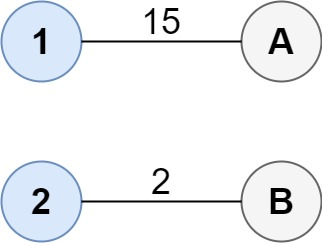

**Input**: $\texttt{cost} = [[15, 96], [36, 2]]$

**Output**: 17

**Explanation**: The optimal way of connecting the groups is:

1--A

2--B

This results in a total cost of 17.

### Example 2:

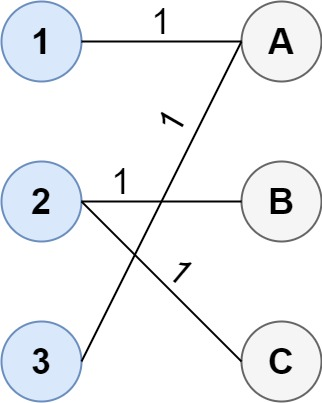

**Input**: $\texttt{cost} = [[1, 3, 5], [4, 1, 1], [1, 5, 3]]$

**Output**: 4

**Explanation**: The optimal way of connecting the groups is:

1--A

2--B

2--C

3--A

This results in a total cost of 4.

Note that there are multiple points connected to point 2 in the first group and point A in the second group. This does not matter as there is no limit to the number of points that can be connected. We only care about the minimum total cost.


Example 3:

**Input**: $\texttt{cost} = [[2, 5, 1], [3, 4, 7], [8, 1, 2], [6, 2, 4], [3, 8, 8]]$

**Output**: 10

```cpp
class Solution {
public:
    int connectTwoGroups(vector<vector<int>>& cost) {
        
    }
};
```